### Importing the data

In [1]:
# use these links to do so:
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Understanding the data

In [2]:
os.getcwd()
data=pd.read_csv("Churn.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data=data.drop('customerID',axis=1)

In [5]:
data[data.iloc[:,:]==' '] = np.NaN

In [6]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data=data.fillna(data.mean())
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [8]:
data_col=data.columns
data_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
le = preprocessing.LabelEncoder()
for i in data_col:
    data[i]=le.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [10]:
X = data.iloc[:,:-2]
y = data[["Churn"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [12]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, data.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges      0.236621
tenure              0.223254
Contract            0.085875
PaymentMethod       0.062115
OnlineSecurity      0.048408
TechSupport         0.047278
gender              0.033528
OnlineBackup        0.030825
PaperlessBilling    0.029956
Partner             0.027330
DeviceProtection    0.026839
MultipleLines       0.026488
InternetService     0.026053
SeniorCitizen       0.024712
Dependents          0.023102
StreamingMovies     0.020739
StreamingTV         0.020642
PhoneService        0.006236
dtype: float64

In [13]:
y.value_counts()

Churn
0        5174
1        1869
dtype: int64

### Data Visualization

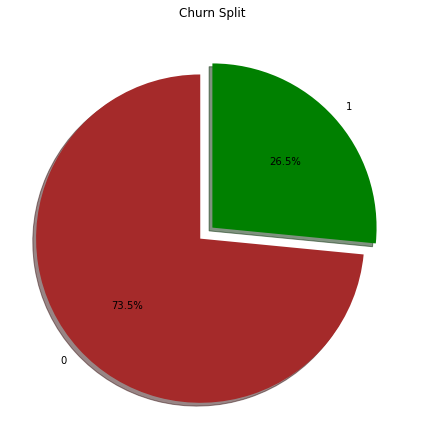

In [14]:
labels, values = zip(*Counter(data["Churn"]).items())
colors = ['brown', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

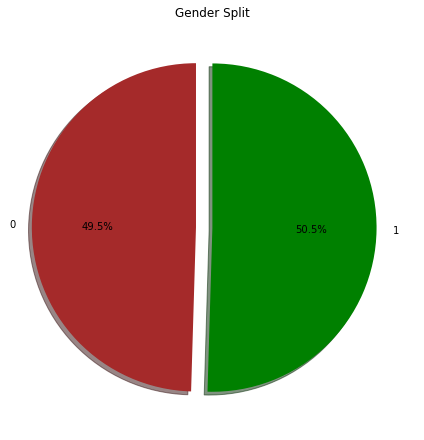

In [15]:
labels, values = zip(*Counter(data["gender"]).items())
colors = ['brown', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

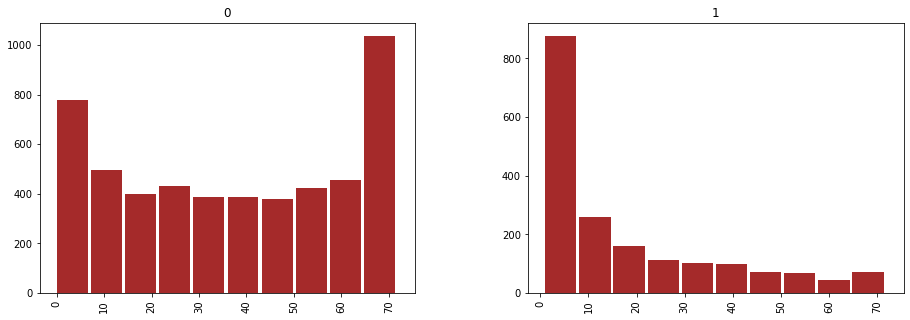

In [16]:
fig=data['tenure'].hist(by=data['Churn'],figsize=(15,5),width=6.5, color='brown' )
plt.show()

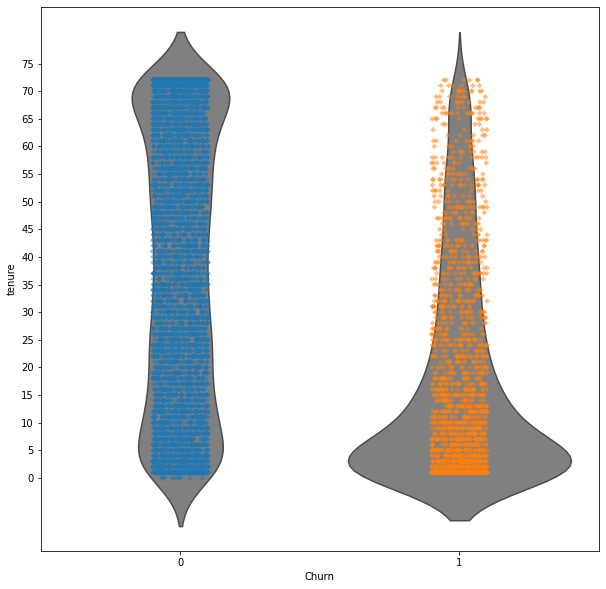

In [17]:
plt.subplots(figsize=(10,10))

g = sns.violinplot(x="Churn", y="tenure", data=data, inner=None,color="0.5")
g = sns.stripplot(x="Churn", y="tenure", data=data, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray")

g.set_yticks(np.arange(0,80,5))
g

In [181]:
data.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.000524,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.106887,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.342425,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,0.082460,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.869504,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.085612,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.463117,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.209245,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.247168,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.352499,-0.195525


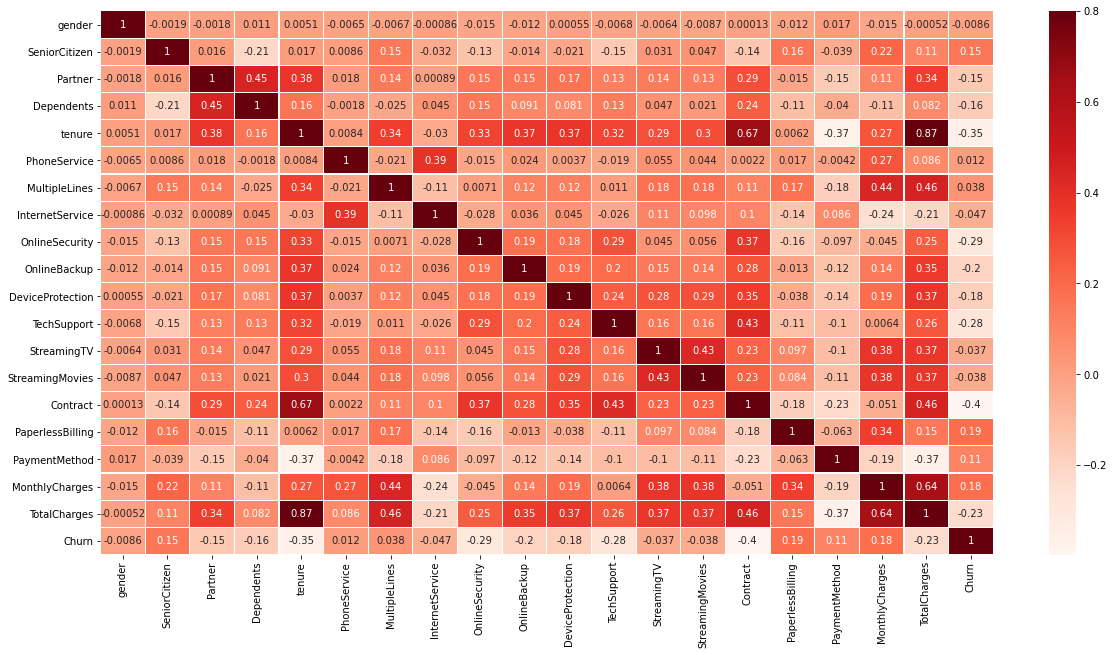

In [182]:
# Correlation Plot of previous table
corrmat = data.corr()

#Set up the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Reds
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [183]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [19]:
#Logistic Regression
lr = LogisticRegression(penalty="l2",C=.1,random_state=0)
lr.fit(X_train_std,y_train)
y_pred_lr = lr.predict(X_test_std)
train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)
print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 80.9 %
Test accuracy: 79.8 %


In [20]:
X_arr = X.values
y_arr = y.values.flatten()
predicted = model_selection.cross_val_predict(LogisticRegression(), X_arr, y_arr, cv=10)
lr_cv_score = round(metrics.accuracy_score(y_arr, predicted)*100,1)
print("Logistic Regression score after using Cross Validation (k=10) is : %s %%"% lr_cv_score)

Logistic Regression score after using Cross Validation (k=10) is : 80.2 %


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Text(0.5, 1.0, 'Logistic Regression')

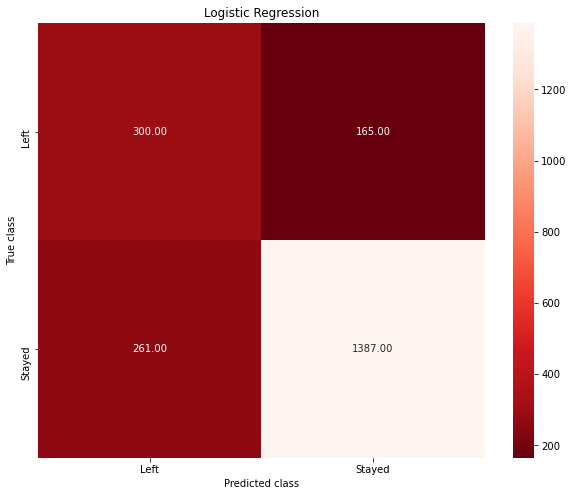

In [25]:
print(classification_report(y_test, y_pred_lr))
#Confusion matrix
logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])
plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Reds_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [26]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")
rfc.fit(X_train_std,y_train)
y_pred_rfc = rfc.predict(X_test_std)
train_acc_rfc = round((rfc.score(X_train_std, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test_std, y_test))*100,1)
print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 99.7 %
Test accuracy: 78.4 %


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.63      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



Text(0.5, 1.0, 'Random Forest Classifier')

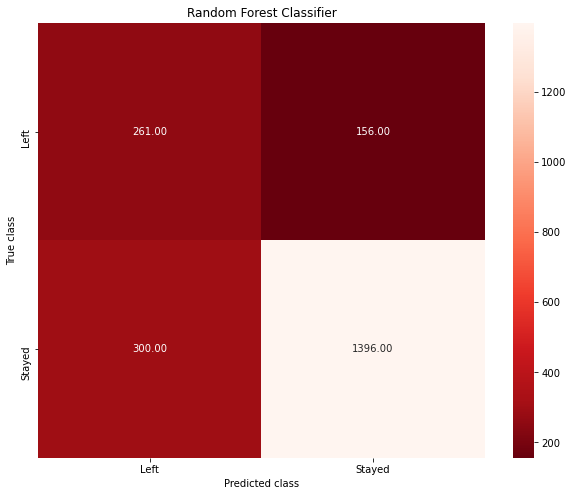

In [27]:
print(classification_report(y_test, y_pred_rfc))
#Confusion matrix
rfc_cm = metrics.confusion_matrix(y_pred_rfc, y_test, [1,0])
plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Reds_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Classifier')

In [28]:
#Decision Tree Classifier
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_std,y_train)
y_pred_dtc = dtc.predict(X_test_std)
train_acc_dtc = round((dtc.score(X_train_std, y_train))*100,1)
test_acc_dtc = round((dtc.score(X_test_std, y_test))*100,1)
print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 99.7 %
Test accuracy: 72.5 %


In [29]:
X_arr = X.values
y_arr = y.values.flatten()
predicted = model_selection.cross_val_score(tree.DecisionTreeClassifier(), X_arr, y_arr, cv=10)
dtc_cv_score = round(np.mean(predicted)*100,1)
print("Decision Tree Classifier score after using Cross Validation (k=10) is : %s %%" % dtc_cv_score)

Decision Tree Classifier score after using Cross Validation (k=10) is : 72.7 %


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.48      0.50      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



Text(0.5, 1.0, 'Decision Tree Classifier')

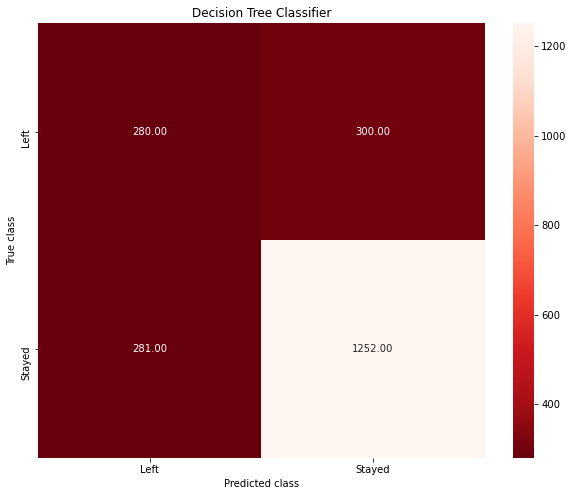

In [30]:
print(classification_report(y_test, y_pred_dtc))
#Confusion matrix
dtc_cm = metrics.confusion_matrix(y_pred_dtc, y_test, [1,0])
plt.figure(figsize=(10,8))
sns.heatmap(dtc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],cmap = plt.cm.Reds_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

In [31]:
#Gaussian Naive-Bayes Classifier
gaussian = GaussianNB()
gaussian.fit(X_train_std, y_train)
y_pred_gauss = gaussian.predict(X_test_std)
train_acc_gauss = round((gaussian.score(X_train_std, y_train))*100,1)
test_acc_gauss = round((gaussian.score(X_test_std, y_test))*100,1)
print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

Training accuracy: 76.1 %
Test accuracy: 75.3 %


In [32]:
predicted = model_selection.cross_val_score(GaussianNB(),X_arr,y_arr,cv=10)
nb_cv_score = round(np.mean(predicted)*100,1)
print("Naive Bayes score after using Cross Validation (k=10) is : %s %%"% nb_cv_score)

Naive Bayes score after using Cross Validation (k=10) is : 75.6 %


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1552
           1       0.53      0.71      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



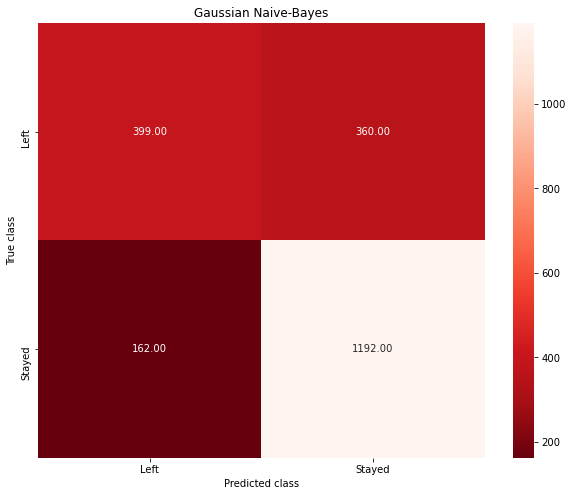

In [33]:
print(classification_report(y_test, y_pred_gauss))
#Confusion matrix
gauss_cm = metrics.confusion_matrix(y_pred_gauss, y_test, [1,0])
plt.figure(figsize=(10,8))
sns.heatmap(gauss_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Reds_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gaussian Naive-Bayes')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_std,y_train)
y_pred_knn = knn.predict(X_test_std)
train_acc_knn = round((knn.score(X_train_std, y_train))*100,1)
test_acc_knn = round((knn.score(X_test_std, y_test))*100,1)
print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

Training accuracy: 85.6 %
Test accuracy: 73.6 %


In [35]:
myList = list(range(0,50))
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
# empty list that will hold cv scores
knn_cv_score = []
# perform 10-fold cross validation
for k in neighbors:
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_score.append(scores.mean())
    
knn_cv_score = np.asarray(knn_cv_score)
#knn_cv_score.mean()
knn_cv_score = round(np.mean(predicted)*100,1)
print("kNN score after using Cross Validation (k=10) is : %s %%"% knn_cv_score)

kNN score after using Cross Validation (k=10) is : 75.6 %


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1552
           1       0.50      0.46      0.48       561

    accuracy                           0.74      2113
   macro avg       0.66      0.65      0.65      2113
weighted avg       0.73      0.74      0.73      2113



Text(0.5, 1.0, 'kNN')

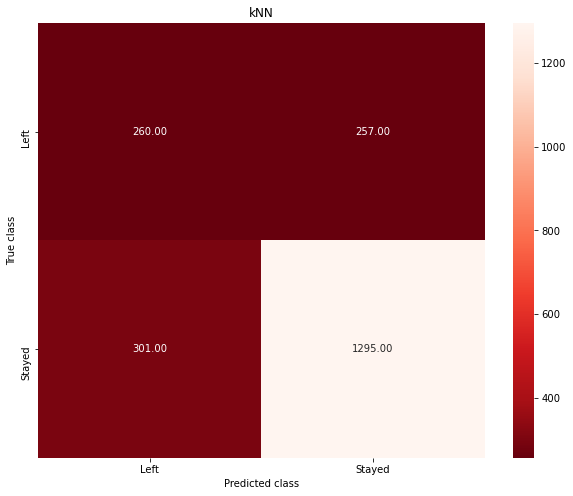

In [36]:
print(classification_report(y_test, y_pred_knn))

#Confusion matrix
knn_cm = metrics.confusion_matrix(y_pred_knn, y_test, [1,0])
plt.figure(figsize=(10,8))
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Reds_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('kNN')

In [42]:
myList = list(range(0,50))
neighbors = filter(lambda x: x % 2 != 0, myList)
knn_cv_score_opt = []
# empty list that will hold cv scores
neighbors = [i for i in myList if myList[i]%2!=0]
# perform 10-fold cross validation
for k in neighbors:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_opt, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_score_opt.append(scores.mean())
    

The optimal number of neighbors is : 29


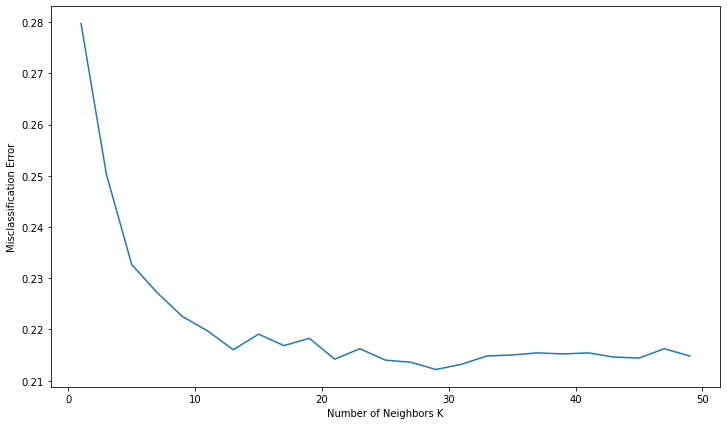

In [43]:
MSE = [1 - x for x in knn_cv_score_opt]

optimal_k = neighbors[MSE.index(min(MSE))]

knn_cv_score_opt = round(np.mean(knn_cv_score_opt)*100,1)

print ("The optimal number of neighbors is :",optimal_k)

plt.figure(figsize=(12,7))
plt.plot(neighbors, MSE)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_opt = KNeighborsClassifier(n_neighbors = optimal_k)

knn_opt.fit(X_train_std,y_train)

y_pred_knn_opt = knn_opt.predict(X_test_std)

train_acc_knn_opt = round((knn_opt.score(X_train_std, y_train))*100,1)

test_acc_knn_opt = round((knn_opt.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn_opt)
print('Test accuracy: %s %%' % test_acc_knn_opt)

Training accuracy: 80.1 %
Test accuracy: 76.4 %


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1552
           1       0.50      0.46      0.48       561

    accuracy                           0.74      2113
   macro avg       0.66      0.65      0.65      2113
weighted avg       0.73      0.74      0.73      2113

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1552
           1       0.56      0.52      0.54       561

    accuracy                           0.76      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



Text(0.5, 51.0, 'Predicted class')

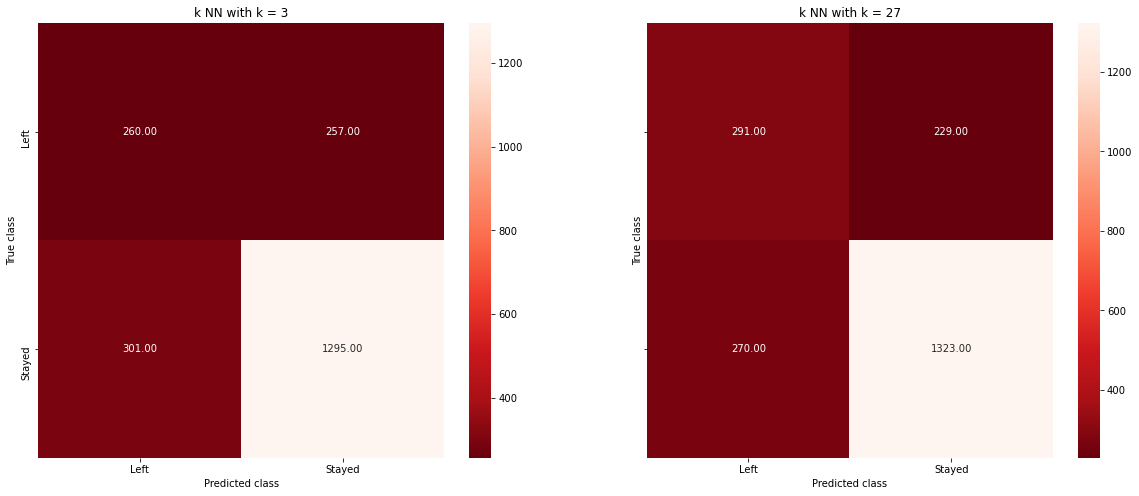

In [46]:
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn_opt))
#Confusion matrix
knn_cm_opt = metrics.confusion_matrix(y_pred_knn_opt, y_test, [1,0])
a=['Deltaic Plains','Hummock and Swale']
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (20,8))
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"],yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Reds_r,ax=ax1)
ax1.set_title("k NN with k = 3")
ax1.set_ylabel('True class')
ax1.set_xlabel('Predicted class')
sns.heatmap(knn_cm_opt, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Reds_r, ax=ax2)
ax2.set_title("k NN with k = 27")
ax2.set_ylabel('True class')
ax2.set_xlabel('Predicted class')


### Model Evaluation

In [47]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'k NN (k=3)', 'k NN (k=27)', 
              'Gaussian Naive-Bayes'],
    'Testing Score': [test_acc_log , test_acc_rfc, test_acc_dtc, test_acc_knn,test_acc_knn_opt,test_acc_gauss],
    'k Fold Cross Validations (k=10)': [lr_cv_score ,"0", dtc_cv_score, knn_cv_score, knn_cv_score_opt, nb_cv_score]
   
})

summary[['Testing Score','k Fold Cross Validations (k=10)']] = summary[['Testing Score','k Fold Cross Validations (k=10)']].astype(str) + '%'
summary.iloc[1,2] = "NA"

summary = summary.sort_values(by='Testing Score', ascending=False).reset_index(drop=True).reindex(range(len(summary)))
summary=summary[['Model','Testing Score','k Fold Cross Validations (k=10)']]

summary

,Model,Testing Score,k Fold Cross Validations (k=10)
0,Logistic Regression,79.8%,80.2%
1,Random Forest Classifier,78.4%,NA
2,k NN (k=27),76.4%,77.9%
3,Gaussian Naive-Bayes,75.3%,75.6%
4,k NN (k=3),73.6%,75.6%
5,Decision Tree Classifier,72.5%,72.7%


### Final Conclusions

In [ ]:
#i have used 5 classifiers for classification that is Random Forest Classifier, 
#Logistic Regression, Gaussian Naive-Bayes, Decision Tree Classifier, k-nearest neighbors.
#this dataset having unbalanced class data
#Based on the model scores, to predict customer churn Logistic Regression seems to be the best model for this dataset.
#we can increase the performance using parameter tuning